In [1]:
ref = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/ref/"
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def extract_positions(IS_name):
    '''Generates a file listing the position of insertions that occured at some point in at least
    one of the clones of one of the populations (only one occurrence per position, even if it occured
    in different populations).'''
    
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(data) if isfile(join(data, f))] #listing all file names for the .gd files
    files = [] # creating a list that will first contain these names to be called, and later on open .gd files
    file_names = [] # list that will contain names as strings (kept as such for all the analysis)
    readlines_names = [] #list that will contain lists with the lines of each file (obtained via readlines())
    for i in onlyfiles: #fixing an error in the list of files (I don't know why it occurs) and filling the previously defined lists
        if len(i) < 30:
            files.append(i)
            file_names.append(i)
            readlines_names.append(i)
    
    
    for i in range(len(files)):
        files[i] = open(data+files[i],"r") #the list files becomes a list of open files
        readlines_names[i] = files[i].readlines() # the list readlines_names becomes a list of lists, with each list containing 
        #all the lines from one file
        
    insertion_positions = {} # Creating a dictionary to hold the positions of the insertions
    for i in range(len(file_names)): # for each file
        for line in readlines_names[i]: #we look at all the lines in the corresponding readlines_names entry
            line = line.split()
            if 'MOB' in line and IS_name in line: #if the line corresponds to a mutation linked to the IS
                insertion_positions[line[4]] = [line[4], line[6]] #we add an entry for this IS position to our dictionary
                # and save the orientation as well
    
    return insertion_positions
    

In [60]:
def interrupted_genes_proportion(insertion_positions):
    '''Uses the list generated by extract_positions() to extract the type of sequence in which insertions occured.
    Returns the proportion of interrupted sequences that are genes.'''
    
    ref_file = open(ref+'REL606.gff3')
    ref_readlines = ref_file.readlines()
    ref_readlines = ref_readlines[5:8897] # we don't need the 4 first lines nor the full fasta sequence
    
    number_insertions_genes = 0
    number_insertions_else = 0
    
    for position in list(set(insertion_positions)):
        line_found = False
        for line_ref in ref_readlines:
            if 'CDS' in line_ref.split()[2]:
                if int(position) >= int(line_ref.split()[3]) and int(position) <= int(line_ref.split()[4]):
                    line_found = True
                    number_insertions_genes += 1
                    break
        if not line_found:
            number_insertions_else += 1
            
    print('total number of insertions: ', number_insertions_genes + number_insertions_else)
    return number_insertions_genes/(number_insertions_genes + number_insertions_else)

In [47]:
def extract_gene_length():
    '''Returns the proportion of coding sequences in the genome of REL606.'''
    
    ref_file = open(ref+'REL606.gff3')
    ref_readlines = ref_file.readlines()
    ref_readlines = ref_readlines[5:8897] # we don't need the 4 first lines or the full fasta sequence
    
    gene_length = 0

        
    for line in ref_readlines:
        line = line.split()
        if 'CDS' in line[2]:
            sequence_length = int(line[4]) - int(line[3]) # length of the segment described by the line
            gene_length += sequence_length
        
    return gene_length
            
    

In [61]:
insertion_positions = extract_positions('IS150')
interrupted_genes_prop = interrupted_genes_proportion(insertion_positions)
gene_length = extract_gene_length()
print(interrupted_genes_prop)
print(gene_length/4629812)

total number of insertions:  270
0.8185185185185185
0.8804217104279828


In [62]:
insertion_positions = extract_positions('IS186')
interrupted_genes_prop = interrupted_genes_proportion(insertion_positions)
print(interrupted_genes_prop)
print(gene_length/4629812)

total number of insertions:  22
0.6818181818181818
0.8804217104279828


In [63]:
insertion_positions = extract_positions('IS1')
interrupted_genes_prop = interrupted_genes_proportion(insertion_positions)
print(interrupted_genes_prop)
print(gene_length/4629812)

total number of insertions:  84
0.6904761904761905
0.8804217104279828


In [9]:
import scipy.stats as stats

In [69]:
1-0.6904761904761905

0.30952380952380953

In [67]:
oddsratio, pvalue = stats.fisher_exact([[0.8185185185185185*270, 0.18148148148148147*270],
                                      [0.8804217104279828*4629812, 0.11957828957201722*4629812]])
pvalue

0.004630677872664159

In [68]:
oddsratio, pvalue = stats.fisher_exact([[0.6818181818181818*22, 0.31818181818181823*22],
                                      [0.8804217104279828*4629812, 0.11957828957201722*4629812]])
pvalue

0.008838461055632376

In [70]:
oddsratio, pvalue = stats.fisher_exact([[0.6904761904761905*84, 0.30952380952380953*84],
                                      [0.8804217104279828*4629812, 0.11957828957201722*4629812]])
pvalue

3.169634712509182e-06

In [18]:
import numpy as np
import matplotlib.pyplot as plt

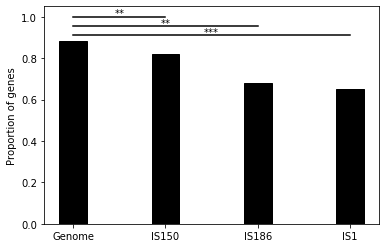

In [71]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [0.8804217104279828, 0.8185185185185185, 0.6818181818181818, 0.651685393258427]

# Choose the height of the error bars (bars1)
#yer1 = [0.5, 0.68, 0.5]
  
# The x position of bars
r1 = np.arange(len(bars1))
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'black', edgecolor = 'black', capsize=7)

# general layout
plt.xticks([r for r in range(len(bars1))], ['Genome', 'IS150', 'IS186', 'IS1'])
plt.ylabel('Proportion of genes')
plt.plot([r1[0], r1[1]], [1, 1], lw=1.5, color = 'black')
plt.plot([r1[0], r1[2]], [0.955, 0.955], lw=1.5, color = 'black')
plt.plot([r1[0], r1[3]], [0.91, 0.91], lw=1.5, color = 'black')
plt.text((r1[0]+r1[1])*.5, 0.995, "**", ha='center', va='bottom', color='black', fontsize =  'medium')
plt.text((r1[0]+r1[2])*.5, 0.945, "**", ha='center', va='bottom', color='black',fontsize =  'medium')
plt.text((r1[0]+r1[3])*.5, 0.9, "***", ha='center', va='bottom', color='black', fontsize =  'medium')

# Show graphic
plt.show()